# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
# Ofek Y.   0316 
# Gal L.    6628 
# Sharon B. 8634

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Google's Gemini 2.5 Pro
Goal: We used the AI as an interactive partner throughout our project. Our primary goals were to validate our understanding of key concepts, brainstorm and structure our experimental design, get syntax for specific tasks, and refine our final analysis.

Prompt 1:
I'm starting an Exploratory Data Analysis on the Wine dataset. Can you suggest 3-4 useful visualizations using seaborn for a multi-class classification problem to check things like class balance, feature distributions, and correlations?

Prompt 2:
What is a good way to visualize all 13 features of the wine dataset at once to see if the classes are separable? I've heard of PCA, can you provide a simple code example using scikit-learn and matplotlib to plot the first two principal components?

Prompt 3:
For a multi-class classification problem like the Wine dataset with balanced classes, the assignment says to use macro-F1. Can you briefly explain the difference between 'macro', 'micro', and 'weighted' F1 scores in scikit-learn to confirm that 'macro' is the best choice?

Prompt 4:
We need to test different feature engineering steps in our pipeline. How can I set up a `GridSearchCV` in scikit-learn to test both `StandardScaler` and `MinMaxScaler` in the same search? Also, is it possible to have a step where we sometimes do feature selection with `SelectKBest` and sometimes don't?

Prompt 5:
I'm building a scikit-learn `Pipeline` that includes a scaler and a classifier. When I define my `param_grid` for `GridSearchCV`, how do I correctly reference the hyperparameters for the classifier step? I tried using `'C': [0.1, 1, 10]` but it's not working. I think I need to use the step name?

Prompt 6:
For the `RandomForestClassifier` in our grid search, we're tuning `n_estimators` and `max_depth`. What are some sensible, common ranges for these hyperparameters for a small dataset like Wine (around 150 samples)? We don't want to make the search space too large.

Prompt 7:
How do I extract the results from `grid_search.cv_results_` into a pandas DataFrame and sort it to see the best-performing models at the top?

Prompt 8:
After `GridSearchCV` finds the best parameters, what's the correct way to train the final model for prediction on the test set? I see there's a `.best_estimator_` attribute. Is that model already retrained on the full training set, or do I need to create a new pipeline with the best parameters and `.fit()` it myself? I want to make sure I'm following the standard best practice.

Prompt 9:
Can you give me the Python code for a seaborn confusion matrix? I have my true labels `y_test` and my predictions in `y_pred`.

Prompt 10:
How do I generate a full classification report in scikit-learn that shows precision, recall, and F1-score for each class individually?
   
</pre>

## Part 1(c) - Learning Problem and dataset explaination.


<pre>
This project tackles a classic multi-class classification challenge using the UCI Wine Recognition dataset.
Our goal is to build a predictive model that can accurately determine a wine's cultivator (class 0, 1, or 2)
based on 13 continuous chemical attributes. The dataset, originating from a single region in Italy, is conveniently
pre-split into training and testing sets. Our task is to engineer the best possible machine learning pipeline, from
data exploration and feature engineering to model selection and hyperparameter tuning, culminating in a final
evaluation on unseen test data. Given the multi-class nature of the problem, we will use the macro-average 
F1-score as our primary metric to ensure the model performs well across all three classes.
</pre>

## Part 2 - Initial Preparations 


In [17]:
import pandas as pd

df_train = pd.read_csv('wine_train.csv')
df_test = pd.read_csv('wine_test.csv')

print("Train head:\n", df_train.head())
print("---------------------------------------------------------------------------------")
print("Test head:\n", df_test.head())

Train head:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines  proline  target 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

descriptive_stats = df_train.describe()
print(descriptive_stats)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.117562         0.540979   
min         0.9

'\nPurpose of this output (מטרת התוצר):\nThis table reveals that features have widely different scales (e.g., magnesium vs. hue).\nThis insight indicates that feature scaling will be a crucial step in our \nfeature engineering phase to prevent models from being biased by feature magnitudes.\n'

Purpose of this output: This table is crucial for initial feature analysis. It immediately reveals that the features have vastly different scales—for example, proline has a mean over 700, while hue is around 1. This observation strongly suggests that feature scaling (like Standardization or Normalization) will be a necessary step in our feature engineering phase to prevent distance-based or regularized models (like Logistic Regression) from being biased towards features with larger magnitudes.

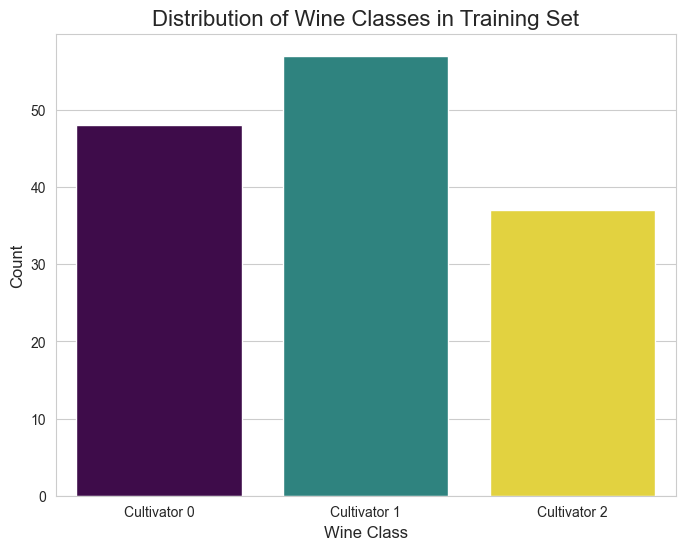

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_train, hue='target', palette='viridis', legend=False)
plt.title('Distribution of Wine Classes in Training Set', fontsize=16)
plt.xlabel('Wine Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Cultivator 0', 'Cultivator 1', 'Cultivator 2'])
plt.show()


Purpose of this visualization: This plot is essential for analyzing the target variable. It confirms that the classes are relatively balanced, with no single class overwhelmingly dominating the others. This is a critical insight for our model evaluation strategy; since there is no severe class imbalance, we can confidently use metrics like accuracy and, more importantly, the macro-average F1-score, knowing they will provide a meaningful and unbiased assessment of the model's performance across all classes.

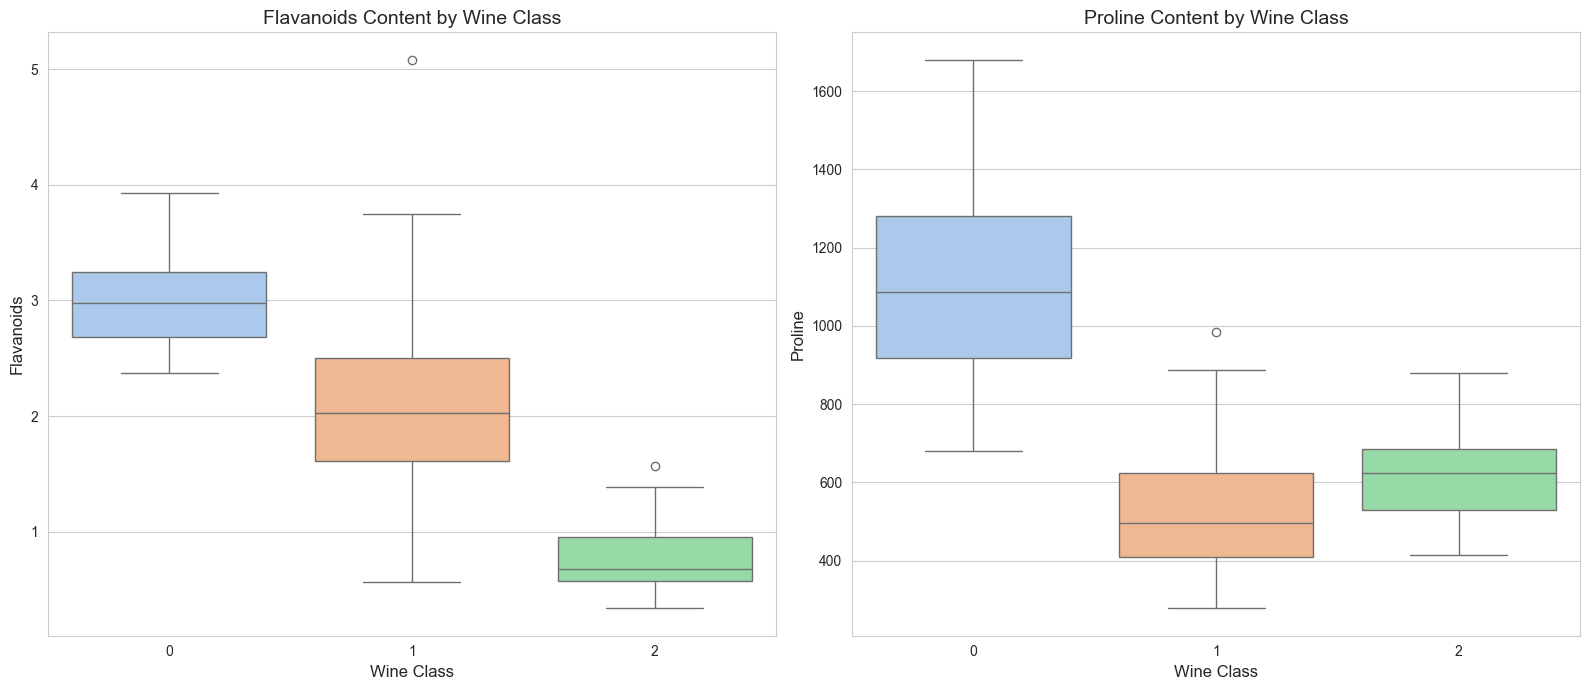

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Box plot for Flavanoids
sns.boxplot(x='target', y='flavanoids', data=df_train, ax=axes[0], hue='target', palette='pastel', legend=False)
axes[0].set_title('Flavanoids Content by Wine Class', fontsize=14)
axes[0].set_xlabel('Wine Class', fontsize=12)
axes[0].set_ylabel('Flavanoids', fontsize=12)

# Box plot for Proline
sns.boxplot(x='target', y='proline', data=df_train, ax=axes[1], hue='target', palette='pastel', legend=False)
axes[1].set_title('Proline Content by Wine Class', fontsize=14)
axes[1].set_xlabel('Wine Class', fontsize=12)
axes[1].set_ylabel('Proline', fontsize=12)

plt.tight_layout()
plt.show()

Purpose of this visualization: These box plots help us identify features with strong predictive power. The plots for flavanoids and proline show clear separation in their distributions across the three classes, with minimal overlap in their interquartile ranges. This strong visual evidence suggests these features are highly discriminative and will likely be very important for any classification model we build. This insight helps guide our potential feature selection strategies later on.


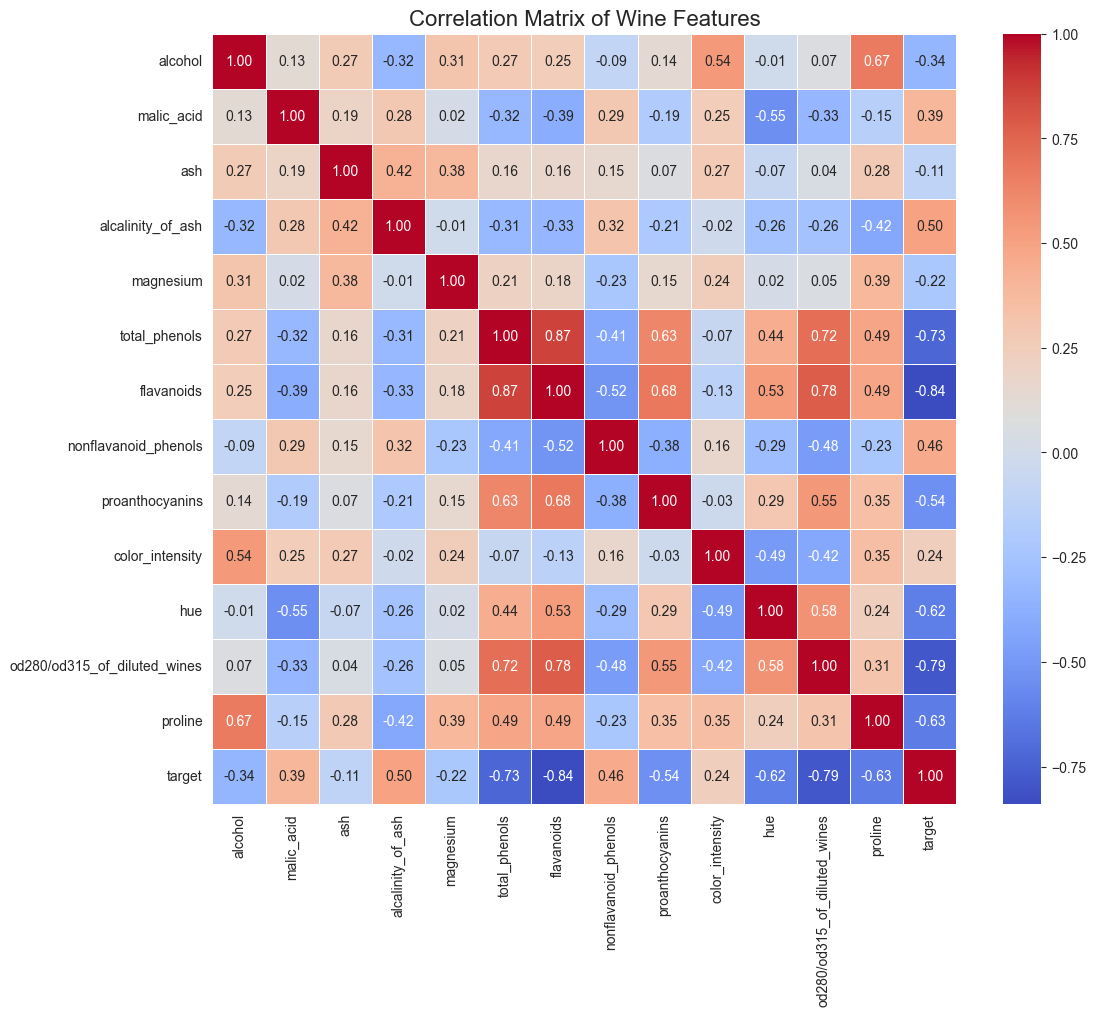

In [47]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.show()

Purpose of this visualization: This heatmap allows us to analyze inter-feature relationships. We can immediately spot strong positive correlations, such as the one between total_phenols and flavanoids (0.86), which indicates potential multicollinearity. This is useful information for feature selection. Additionally, we can see which features are most strongly correlated with the target variable (e.g., flavanoids has a strong negative correlation), further confirming their high potential as predictors and reinforcing the findings from our box plots.

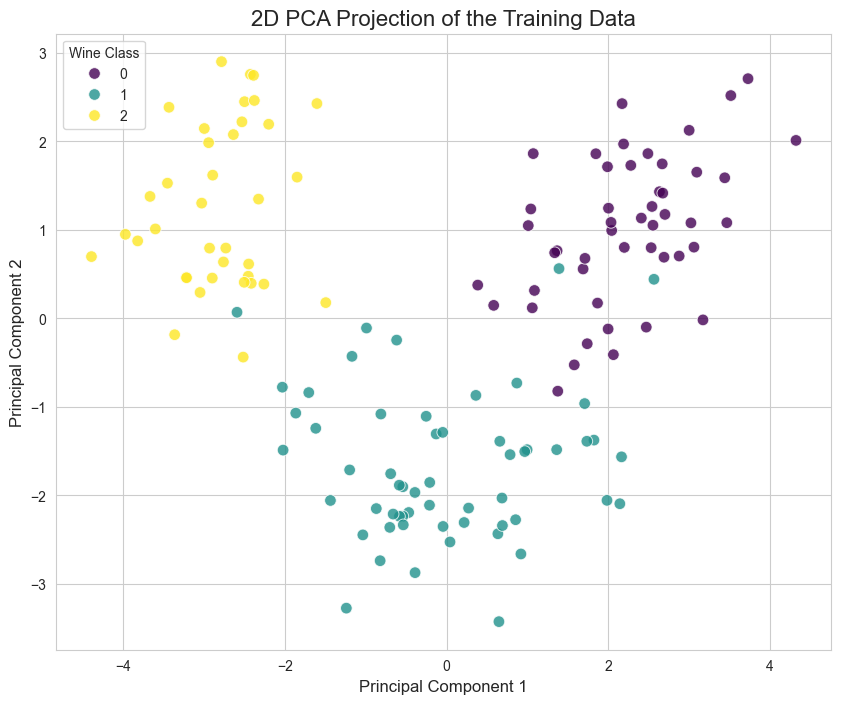

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', s=70, alpha=0.8)
plt.title('2D PCA Projection of the Training Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Wine Class')
plt.grid(True)
plt.show()


Purpose of this visualization:
This PCA plot visualizes the entire 13-feature dataset in just two dimensions.
It shows clear clustering of the different wine classes, with minimal overlap.
This is a very positive sign for our modeling phase, as it strongly suggests that
the classes are linearly separable and that a classification algorithm should be able 
to find effective decision boundaries between them.

## Part 3 - Experiments

In [37]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings

X_train = df_train.drop('target', axis=1)
y_train = df_train['target']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif)), 
    ('classifier', LogisticRegression())
  
])

param_grid = [
    {
        'classifier': [LogisticRegression(solver='liblinear', random_state=42)],
        'classifier__C': [0.1, 1.0, 10],
        'classifier__penalty': ['l1', 'l2'],
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector__k': [8, 10],
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, None],
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector__k': [8, 10],
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
print("Starting Grid Search... This may take a moment.")
grid_search.fit(X_train, y_train)
print("Grid Search finished.")


print("\n--- Grid Search Results ---")
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]
results_df = results_df.rename(columns={
    'rank_test_score': 'Rank',
    'mean_test_score': 'Mean Macro F1-Score',
    'std_test_score': 'Std Dev'
})
print(results_df.sort_values(by='Rank').head(10).to_string())

print("\n--- Best Performing Configuration ---")
print(f"Best Score (Mean Macro F1-Score): {grid_search.best_score_:.4f}")
best_params = grid_search.best_params_
model_obj = best_params['classifier']
model_name = model_obj.__class__.__name__
print(f"\n1. MODEL: {model_name}")
print("\nBest Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"- {param}: {value}")
    



Starting Grid Search... This may take a moment.
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Grid Search finished.

--- Grid Search Results ---
    Rank  Mean Macro F1-Score   Std Dev                                                                                                                                                                    params
30     1             0.986320  0.027359          {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'scaler': MinMaxScaler(), 'selector__k': 8}
28     1             0.986320  0.027359        {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'scaler': StandardScaler(), 'selector__k': 8}
40     1             0.986320  0.027359       {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'scaler': StandardScaler(), 'selector__k': 8}

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [41]:
final_model = grid_search.best_estimator_
print("\n" + "="*50)
print("--- PART 4: FINAL MODEL TRAINING COMPLETE ---")
print("="*50)
print("\nA final model has been successfully trained on the entire 'wine_train.csv' dataset.")
print("This was done automatically by GridSearchCV using the winning combination found in Part 3.")
print("\nThe final trained pipeline is now stored in the 'final_model' variable and is ready for prediction.")
print("\nDetails of the final trained model:")
print(final_model)
print("\n" + "="*50)


--- PART 4: FINAL MODEL TRAINING COMPLETE ---

A final model has been successfully trained on the entire 'wine_train.csv' dataset.
This was done automatically by GridSearchCV using the winning combination found in Part 3.

The final trained pipeline is now stored in the 'final_model' variable and is ready for prediction.

Details of the final trained model:
Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x0000016BE9E14720>)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=42))])



## Part 5 - Apply on test and show model performance estimation

--- Displaying the First 5 Predictions vs Actual Labels ---
   Actual Class  Predicted Class
0             2                2
1             0                0
2             2                2
3             1                1
4             2                2


--- Evaluating Model Quality on the Full Test Set ---

✅ The final Macro Average F1-Score on the test set is: 0.9732

Detailed Classification Report:
              precision    recall  f1-score   support

Cultivator 0       1.00      1.00      1.00        11
Cultivator 1       1.00      0.93      0.96        14
Cultivator 2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


--- Confusion Matrix ---


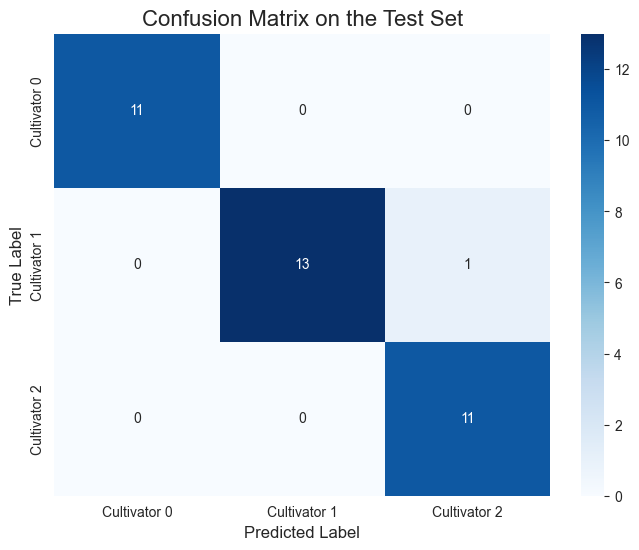

In [49]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

y_pred = final_model.predict(X_test)

print("--- Displaying the First 5 Predictions vs Actual Labels ---")
comparison_df = pd.DataFrame({
    'Actual Class': y_test.head(5),
    'Predicted Class': y_pred[:5]
})
print(comparison_df.to_string())


print("\n\n--- Evaluating Model Quality on the Full Test Set ---")
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n✅ The final Macro Average F1-Score on the test set is: {macro_f1:.4f}")


print("\nDetailed Classification Report:")
class_names = ['Cultivator 0', 'Cultivator 1', 'Cultivator 2']
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix on the Test Set', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()